In [9]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# ==================================== #
#  Constants
# ==================================== #

e = 1.602e-19                           #charge of a electron, C / electron volt, J
epsilon0 = 8.854e-12                    #vaccum dielectric constant, F/m
me = 9.109e-31                          #mass of a electron , kg
h = 6.626e-34                           #Planck constant, J*s 
hbar = h/(2*np.pi)
NA = 6.022e23
kb = 1.38e-23                            # Boltzmann constant, J/K
aB = 4*np.pi*epsilon0*hbar**2 / (me*e**2)# Bohr radius, m
Ry = 13.6                                # Ryberg, eV

cal2J = 4.184 
# ==================================== #
#  Metal Units <---> S.I. Units
# ==================================== #

J2eV = 6.2442e18
m2A = 1e10
gmol2g = 1/NA
kg2gmol = 1e3/gmol2g
s2ps = 1e12
s2fs = 1e15

cm2m = 1e-2
gcc2kgm3 = 1e-3/(cm2m**3)

bar2Pa = 1e5
kbar2GPa = 1e3*bar2Pa/1e9
Pa2GPa = 1e-9

kg2g=1e3
m2cm=1e2
mJ2J = 1e-3        

nm2A = 10

# ==================================== #
#  Atomic Units <---> Metal/S.I. Units
# ==================================== #

m2bohr = 1/aB
A2bohr = m2bohr/m2A
eV2Ry = 1/Ry

# ==================================== #
#  PHONON
# ==================================== #

c = 3*10**8                               # speed of light, m/s
omega2k = s2ps*1/(c) *cm2m                # 1/ps -> 1/cm

unit_trans = 1/ NA * (1 / m2cm * m2A) **3 
vpa2rho = (24.3050 + 15.9994) / NA / (1/m2A**3) / (m2cm**3)


## Fig.1 (b) Comparison of thermal conductivity along isotherm of 2000 K

Text(0, 0.5, '$\\kappa$ ($\\rm{Wm^{-1}K^{-1}}$)')

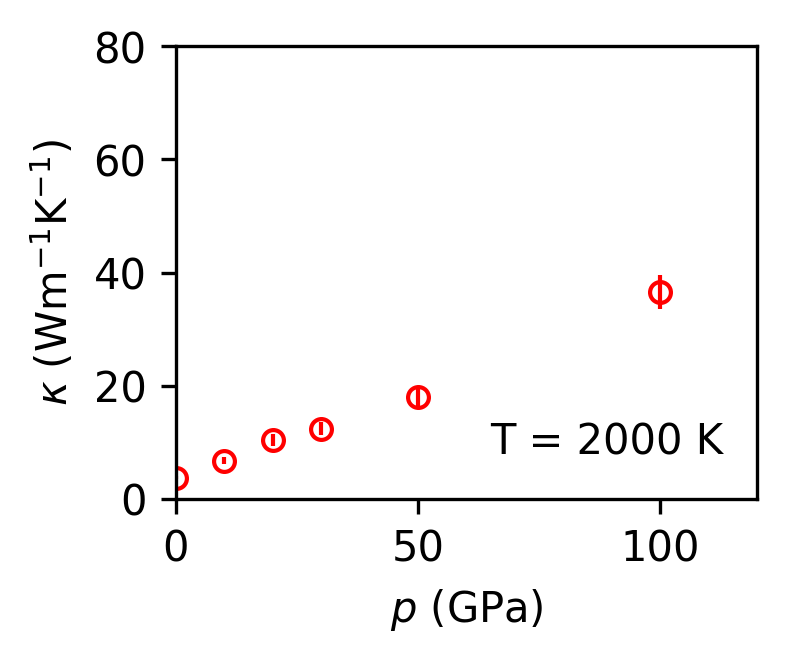

In [ ]:
from scipy import interpolate

# ==================
# NOTE that this directory should change
# ==================
comp_dir = './compare/'

def _comp_plot_2kk(ax):

    data = np.loadtxt(comp_dir +'kappa_2kk_goncharov2008.txt')
    data2 = np.loadtxt(comp_dir +'kappa_2kk_goncharov2008_u.txt')
    ax.errorbar(data[:,0],data[:,1], yerr = data2[:,1]-data[:,1],
                fmt='s', color='k', markersize=3, mfc='white', lw=0.5,
                mew=0.5,label='Expt. from Goncharov et al.', zorder=4)
    

    data = np.loadtxt(comp_dir +'kappa_2kk_kwon_23.txt')
    ax.plot(data[:,0],data[:,1],'--', color='dimgray', linewidth=1.5, markersize=4,  alpha=0.6,
            mfc='none',mew=0.5,label='$\kappa_{BTE}^{(3)}$ from Kwon et al.')

    data = np.loadtxt(comp_dir+'kappa_2kk_kwon_234.txt')
    ax.plot(data[:,0],data[:,1],'-', color='dimgray', linewidth=1.5, markersize=4, alpha=0.6,
            mfc='none',mew=0.5,label='$\kappa_{BTE}^{(3+4)}$ from Kwon et al.')

    
kappa_2kk = np.array([
       [2000.,  2000., 2000, 2000., 2000., 2000., 2000., 2000., 2000., 2000.],
       [0, 10,20,30, 50, 100, 200, 300, 400, 500],
       [3.21920249526526, 3.52752753, 3.73073073, 3.90590591, 
       4.20720721, 4.7957958 , 5.63663664, 6.27427427, 6.7997998 ,
       7.26226226],
       [ 3.7813941260626667, 6.765048066693334 ,10.461626017870001,12.457138026238331,17.999787126188668,36.62854729228267 ,69.35657958305734 ,98.27332622624266 ,129.89468462254334 ,155.76683677551583 ],
       [0.2679223334899962, 0.612031819761114,0.9931988522565502,1.1649619182020499,1.5183560092000763,2.9688730772534355,4.556136713494715,8.518463599358885,12.753557458569674, 15.906425718335903 ]])
    
fig, ax = plt.subplots(figsize=(2.5, 2),dpi=300)

_comp_plot_2kk(ax)

cl = generate_colormap(5, plt.cm.Reds)

kappa_list = [kappa_2kk,]
temp_list  = [2000, ]

for idx in range(1):
    
    kappa = kappa_list[idx]
    temp  = temp_list[idx]
    
    ax.errorbar( kappa[1], kappa[3], yerr= kappa[4], color='r',
                fmt='o', mfc='none', 
                ms=5, mew=1.0, lw=1.0, 
                label='DP')#'$\kappa_{DPMD}$')
    

handles, labels = ax.get_legend_handles_labels()

handles[0], handles[1], handles[2], handles[3] = handles[2], handles[0], handles[1], handles[3]
labels[0], labels[1], labels[2], labels[3] = labels[2], labels[0], labels[1], labels[3]

ax.legend(handles, labels,fontsize=7,frameon=False,)# ncol=2)

ax.text(65, 8, 'T = 2000 K')
ax.set_xlim(0, 120)
ax.set_ylim(0, 80)
ax.set_xlabel('$p$ (GPa)')
ax.set_ylabel('$\kappa$ ($\\rm{Wm^{-1}K^{-1}}$)')